In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import censusdata
import re
import geopandas

censuskey = '7b3e8a6afe58867abcf5aecad26845d802115f1f'

In [8]:
#Define Funtions

#Funcion For NonDigit Removing Characters from Row - Used for Extracting GEOID
def remove_chars(s):
    clean = int(re.sub('[^0-9]+', '', str(s))[-11:])
    return clean

#Function to get census data according to requirements
def getcensustables(table):
    tablename = 'data_' + table
    print(f' Downloading {table}')
    
    # Set requirements to pull from Census API
    
    variablestopull = allvariablescsv.loc[allvariablescsv['Group']==table]['Name'].tolist()

    #print(len(variablestopull)) - 50 max
    
    #variablestopull = variables['Name'].tolist()

    #variablestopull = variables['Name'].tolist()
    listofcounties = ['121', '089']
    yearstopull = range(2014,2018,1)

    #Pull Census Data according to requirement above
    atlantadata = pd.DataFrame()

    for year in yearstopull:
        for county in listofcounties:

            newdata = censusdata.download('acs5', year, censusdata.censusgeo([('state', '13'), ('county', county), ('tract', '*')]),variablestopull,censuskey)
            type(newdata)
            newdata['YEAR'] = year
            atlantadata = atlantadata.append(newdata)

    #Rename Column Headings from Code to Text
    for variable in variablestopull:
        #print(variable)
        renamevar1 = allvariablescsv.loc[allvariablescsv['Name']==variable]['Label'].iloc[0]
        renamevar2 = allvariablescsv.loc[allvariablescsv['Name']==variable]['Concept'].iloc[0]
        renamevar = renamevar2 + '_'+ renamevar1
        #print(renamevar)
        atlantadata = atlantadata.rename(columns={variable: renamevar})

    #Transform Index to create GeoID


    #Create GeoID Column
    atlantadata['Name2'] = atlantadata.index
    atlantadata['GEOID'] = atlantadata['Name2'].apply(remove_chars)
    atlantadata.drop(columns=['Name2'], inplace=True)
    
    #Only Keep Atlanta Census Tracts(Geocodes)
    finaldata = atlantageocodes.merge(atlantadata, how='left', on='GEOID')
    
    finaldata = finaldata.dropna(axis=0, how='any')
    
    return finaldata

In [10]:
#Code Begins here

#Tables to Load
tablestoloadcsv = pd.read_csv('data/tablestopull.csv')
tablestoload = tablestoloadcsv['Tables'].tolist()

tablestoload = ['B19013','B01003','B11001', 'B25064', 'B25074','B25063', 'B25061']

#Allvariables Table
allvariablescsv = pd.read_csv('data/allvariables.csv')

#Atlanta Geo Codes Table
atlantageocodes = pd.read_csv('data/atlantageocodes.csv')

#Create dictionary with each cleaned table as an entry
alltables = dict()  

for table in tablestoload:
    try:
        data = pd.read_csv('data/' + table + '.csv')
        alltables[table] = data
        print(f'Loading {table}')
    except:
        data = getcensustables(table)
        alltables[table] = data

        data.to_csv('data/' + table + '.csv')
        
        

Loading B19013
Loading B01003
Loading B11001
Loading B25064
Loading B25074
Loading B25063
Loading B25061


In [6]:
# #Example Usage of Occupancy Over Time

# occupancytable = alltables['B25002']

# occupancytable = occupancytable.groupby('YEAR').sum()
# occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

# #print(occupancytable.head())

# occupancytable = occupancytable.reset_index()


# plt.plot(occupancytable['YEAR'], occupancytable['Percent_Occupied'])
# plt.title("Occupancy Over Time", fontsize=18)
# plt.xlabel("Years", fontsize=18)
# plt.ylabel("Occupancy %", fontsize=18)


,GEOID,Median Rent,YEAR
0,13121006601,819.0,2010.0
1,13121006601,775.0,2011.0
2,13121006601,820.0,2012.0
3,13121006601,818.0,2013.0
4,13121006601,836.0,2014.0
5,13121006601,868.0,2015.0
6,13121006601,937.0,2016.0
7,13121006601,958.0,2017.0
8,13121006700,910.0,2010.0
9,13121006700,904.0,2011.0


,YEAR,GEOID,Median Rent
0,2010.0,1.311824e+10,879.929134
1,2011.0,1.311824e+10,914.858268
2,2012.0,1.311821e+10,955.738095
3,2013.0,1.311821e+10,967.619048
4,2014.0,1.311821e+10,988.206349
5,2015.0,1.311821e+10,997.539683
6,2016.0,1.311821e+10,1031.158730
7,2017.0,1.311821e+10,1074.119048


Text(0, 0.5, 'mrent')

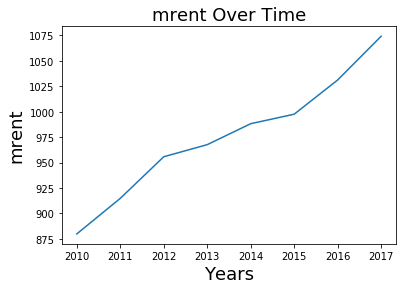

In [51]:
#Median rent Over Time

mrenttable = alltables['B25064']

#display(mrenttable)

mrenttable = mrenttable.rename(columns={"MEDIAN GROSS RENT (DOLLARS)_Estimate!!Median gross rent": "Median Rent"})

display(mrenttable)

#Select Valid mrents

mrenttable = mrenttable.loc[mrenttable['Median Rent']>0]
mrenttable2 = mrenttable.loc[mrenttable['Median Rent']>0]


#Average By Year

mrenttable = mrenttable.groupby('YEAR').mean()

mrenttable = mrenttable.reset_index()

display(mrenttable)

#Make Graph

plt.plot(mrenttable['YEAR'], mrenttable['Median Rent'])
plt.title("mrent Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("mrent", fontsize=18)

,YEAR,GEOID,Median Household Income
0,2010.0,1.311824e+10,49788.795276
1,2011.0,1.311824e+10,50449.724409
2,2012.0,1.311821e+10,51197.904762
3,2013.0,1.311821e+10,51601.373016
4,2014.0,1.311821e+10,52109.277778
5,2015.0,1.311821e+10,53694.166667
6,2016.0,1.311824e+10,54804.496063
7,2017.0,1.311824e+10,58326.007874


Text(0, 0.5, 'Income')

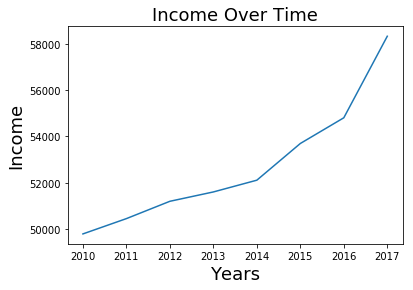

In [52]:
#Income Over Time

incometable = alltables['B19013']

incometable = incometable.rename(columns={"MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)": "Median Household Income"})

#display(incometable)

#Select Valid Incomes

incometable = incometable.loc[incometable['Median Household Income']>0]
incometable2 = incometable.loc[incometable['Median Household Income']>0]


#Average By Year

incometable = incometable.groupby('YEAR').mean()

incometable = incometable.reset_index()

display(incometable)

#Make Graph

plt.plot(incometable['YEAR'], incometable['Median Household Income'])
plt.title("Income Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Income", fontsize=18)


,YEAR,GEOID,Population
0,2010.0,1679136954652,427948.0
1,2011.0,1679136954652,433660.0
2,2012.0,1666015950952,437431.0
3,2013.0,1666015950952,444858.0
4,2014.0,1679136954652,452450.0
5,2015.0,1679136954652,461062.0
6,2016.0,1679136954652,467170.0
7,2017.0,1679136954652,476204.0


Text(0, 0.5, 'Population')

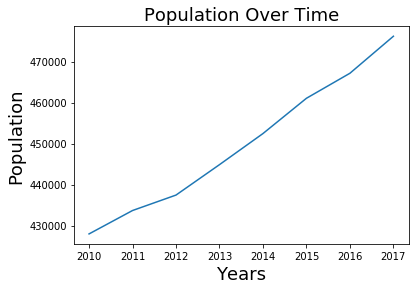

In [8]:
#Population Over Time

populationtable = alltables['B01003']

#display(populationtable)

populationtable = populationtable.rename(columns={"TOTAL POPULATION_Estimate!!Total": "Population"})

#display(populationtable)

#Select Valid populations

populationtable = populationtable.loc[populationtable['Population']>0]

#Average By Year

populationtable = populationtable.groupby('YEAR').()

populationtable = populationtable.reset_index()

display(populationtable)

#Make Graph

plt.plot(populationtable['YEAR'], populationtable['Population'])
plt.title("Population Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Population", fontsize=18)


,YEAR,GEOID,Total Households,HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total!!Family households,HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total!!Family households!!Married-couple family,HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total!!Family households!!Other family,"HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total!!Family households!!Other family!!Male householder, no wife present","HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total!!Family households!!Other family!!Female householder, no husband present",HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total!!Nonfamily households,HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total!!Nonfamily households!!Householder living alone,HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total!!Nonfamily households!!Householder not living alone
0,2010.0,1.311824e+10,1448.511811,651.881890,377.488189,274.393701,50.425197,223.968504,796.629921,644.062992,152.566929
1,2011.0,1.311824e+10,1451.866142,653.598425,374.236220,279.362205,53.913386,225.448819,798.267717,640.661417,157.606299
2,2012.0,1.311821e+10,1459.547619,649.777778,376.626984,273.150794,51.452381,221.698413,809.769841,653.285714,156.484127
3,2013.0,1.311821e+10,1465.714286,652.515873,385.984127,266.531746,49.460317,217.071429,813.198413,662.563492,150.634921
4,2014.0,1.311824e+10,1471.267717,644.732283,381.133858,263.598425,49.425197,214.173228,826.535433,674.125984,152.409449
5,2015.0,1.311824e+10,1504.362205,645.771654,388.480315,257.291339,49.385827,207.905512,858.590551,701.866142,156.724409
6,2016.0,1.311824e+10,1531.267717,649.377953,389.511811,259.866142,46.472441,213.393701,881.889764,727.251969,154.637795
7,2017.0,1.311824e+10,1558.385827,668.440945,400.803150,267.637795,50.086614,217.551181,889.944882,731.866142,158.078740


Text(0, 0.5, 'hhs')

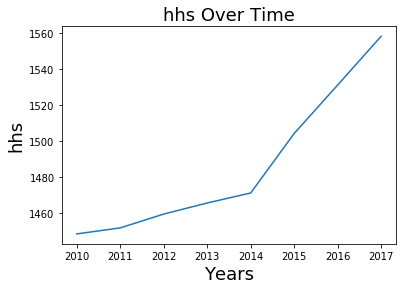

In [53]:
#hhs Over Time

hhstable = alltables['B11001']

#display(hhstable)

hhstable = hhstable.rename(columns={"HOUSEHOLD TYPE (INCLUDING LIVING ALONE)_Estimate!!Total": "Total Households"})

#display(hhstable)

#Select Valid hhss

hhstable = hhstable.loc[hhstable["Total Households"]>0]
hhstable2 = hhstable.loc[hhstable["Total Households"]>0]


#Average By Year

hhstable = hhstable.groupby('YEAR').mean()

hhstable = hhstable.reset_index()

display(hhstable)

#Make Graph

plt.plot(hhstable['YEAR'], hhstable["Total Households"])
plt.title("hhs Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("hhs", fontsize=18)


,Income to Pop,Median Household Income,Population,Year
0,0.116343,49788.795276,427948.0,2010.0
1,0.116335,50449.724409,433660.0,2011.0
2,0.117042,51197.904762,437431.0,2012.0
3,0.115995,51601.373016,444858.0,2013.0
4,0.115171,52109.277778,452450.0,2014.0
5,0.116458,53694.166667,461062.0,2015.0
6,0.117312,54804.496063,467170.0,2016.0
7,0.122481,58326.007874,476204.0,2017.0


Text(0, 0.5, 'Income')

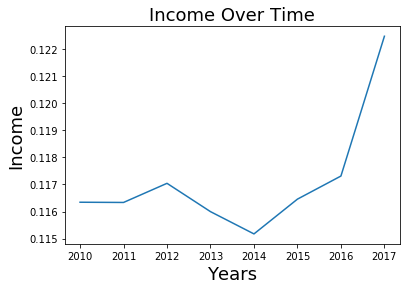

In [9]:
sumincometable = pd.DataFrame()
#Average By Year

sumincometable['Income to Pop'] = incometable['Median Household Income'] / populationtable['Population']
sumincometable['Median Household Income'] = incometable['Median Household Income']
sumincometable['Population'] = populationtable['Population']
sumincometable['Year'] = incometable['YEAR']



#incometopoptable = incometable.reset_index()

display(sumincometable)

#Make Graph

plt.plot(sumincometable['Year'], sumincometable['Income to Pop'])
plt.title("Income Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Income", fontsize=18)

,Income to HHs,Rent to Income,Median Household Income,HHs,Year,Median Rent
0,34.372378,0.017673,49788.795276,1448.511811,2010.0,879.929134
1,34.748193,0.018134,50449.724409,1451.866142,2011.0,914.858268
2,35.077927,0.018668,51197.904762,1459.547619,2012.0,955.738095
3,35.205615,0.018752,51601.373016,1465.714286,2013.0,967.619048
4,35.417944,0.018964,52109.277778,1471.267717,2014.0,988.206349
5,35.692313,0.018578,53694.166667,1504.362205,2015.0,997.539683
6,35.790277,0.018815,54804.496063,1531.267717,2016.0,1031.158730
7,37.427193,0.018416,58326.007874,1558.385827,2017.0,1074.119048


Text(0, 0.5, 'Rent as %')

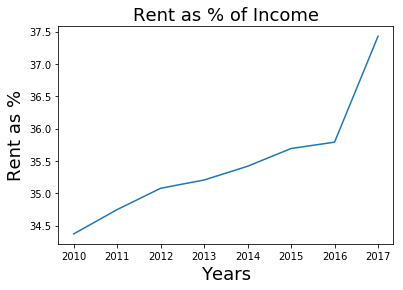

In [56]:
sumincometable = pd.DataFrame()
#Average By Year

sumincometable['Income to HHs'] = incometable['Median Household Income'] / hhstable["Total Households"] 
sumincometable['Rent to Income'] = mrenttable['Median Rent'] / incometable['Median Household Income']
sumincometable['Median Household Income'] = incometable['Median Household Income']
sumincometable['HHs'] = hhstable["Total Households"]
sumincometable['Year'] = incometable['YEAR']
sumincometable['Median Rent'] = mrenttable['Median Rent']



#incometopoptable = incometable.reset_index()

display(sumincometable)

#Make Graph

plt.plot(sumincometable['Year'], sumincometable['Income to HHs'])
plt.title("Rent as % of Income", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Rent as %", fontsize=18)

,Income to HHs,Median Household Income,HHs,GEOID,Year
0,43.692412,32245.0,738.0,13121006601,2010.0
1,41.180593,30556.0,742.0,13121006601,2011.0
2,41.578481,32847.0,790.0,13121006601,2012.0
3,37.418317,30234.0,808.0,13121006601,2013.0
4,37.482456,29911.0,798.0,13121006601,2014.0
5,47.259591,36957.0,782.0,13121006601,2015.0
6,37.372796,29674.0,794.0,13121006601,2016.0
7,47.447644,36250.0,764.0,13121006601,2017.0
8,18.173118,25824.0,1421.0,13121006700,2010.0
9,17.257795,22694.0,1315.0,13121006700,2011.0


,Year,Income to HHs,Median Household Income,HHs,GEOID
0,2010.0,39.143595,49788.795276,1448.511811,1.311824e+10
1,2011.0,42.009755,50449.724409,1451.866142,1.311824e+10
2,2012.0,40.603672,51197.904762,1459.547619,1.311821e+10
3,2013.0,41.417584,51601.373016,1465.714286,1.311821e+10
4,2014.0,41.686946,52109.277778,1482.706349,1.311821e+10
5,2015.0,44.095418,53694.166667,1512.555556,1.311821e+10
6,2016.0,44.366958,54804.496063,1531.267717,1.311824e+10
7,2017.0,46.294262,58326.007874,1558.385827,1.311824e+10


Text(0, 0.5, 'Income')

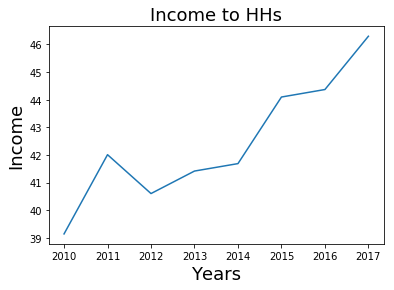

In [45]:
sumincometable = pd.DataFrame()
#Average By Year

sumincometable['Income to HHs'] = incometable2['Median Household Income'] / hhstable2["Total Households"] 
sumincometable['Median Household Income'] = incometable2['Median Household Income']
sumincometable['HHs'] = hhstable2["Total Households"]
sumincometable['GEOID'] = hhstable2["GEOID"]
sumincometable['Year'] = incometable2['YEAR']
display(sumincometable)

sumincometable = sumincometable.groupby('Year').mean()


sumincometable = sumincometable.reset_index()

display(sumincometable2)

#Make Graph

plt.plot(sumincometable['Year'], sumincometable['Income to HHs'])
plt.title("Income to HHs", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Income", fontsize=18)

In [ ]:
sumincometable = pd.DataFrame()
#Average By Year

sumincometable['Income to HHs'] = incometable['Median Household Income'] / hhstable["Total Households"] 
sumincometable['Median Household Income'] = incometable['Median Household Income']
sumincometable['HHs'] = hhstable["Total Households"]
sumincometable['Year'] = incometable['YEAR']

HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS


#incometopoptable = incometable.reset_index()

display(sumincometable)

#Make Graph

plt.plot(sumincometable['Year'], sumincometable['Income to HHs'])
plt.title("Income Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Income", fontsize=18)

In [10]:
occupancytable = alltables['B25002']

occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 


geotable = geopandas.read_file('tractdata/tl_2018_13_tract.shp')
#geotable = geotable.astype('int64').dtypes
geotable[['GEOID']] = geotable[['GEOID']].astype('int64')

geotable2 = atlantageocodes.merge(geotable, how='left', on='GEOID')

geotable2 = geotable.set_index('GEOID').join(occupancytable.set_index('GEOID'))

geotable2 = geotable2.dropna(axis=0, how='any')

geotable2.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'Percent_Occupied'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# create map
geotable2.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.title("Occupancy Rate By Area", fontsize=18)

KeyError: 'B25002'

In [252]:
occupancytable = alltables['B25002']

occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 


geotable = geopandas.read_file('tractdata/tl_2018_13_tract.shp')
#geotable = geotable.astype('int64').dtypes
geotable[['GEOID']] = geotable[['GEOID']].astype('int64')

geotable2 = atlantageocodes.merge(geotable, how='left', on='GEOID')

geotable2 = geotable.set_index('GEOID').join(occupancytable.set_index('GEOID'))

geotable2 = geotable2.dropna(axis=0, how='any')

geotable2.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'Percent_Occupied'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# create map
geotable2.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.title("Occupancy Rate By Area", fontsize=18)

KeyError: 'B25002'

In [184]:
#Example Usage of Occupancy Over Time

hhbyincome = alltables['B25122']

hhbyincome = hhbyincome.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

display(hhbyincome.head())

# occupancytable = occupancytable.reset_index()


# plt.plot(occupancytable['YEAR'], occupancytable['Percent_Occupied'])
# plt.title("Occupancy Over Time", fontsize=18)
# plt.xlabel("Years", fontsize=18)
# plt.ylabel("Occupancy %", fontsize=18)



,GEOID,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent!!Less than $100","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent!!$100 to $199","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent!!$200 to $299","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent!!$300 to $399","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent!!$400 to $499","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent!!$500 to $599",...,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!$20,000 to $34,999!!With cash rent!!$400 to $499","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!$20,000 to $34,999!!With cash rent!!$500 to $599","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!$20,000 to $34,999!!With cash rent!!$600 to $699","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!$20,000 to $34,999!!With cash rent!!$700 to $799","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!$20,000 to $34,999!!With cash rent!!$800 to $899","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!$20,000 to $34,999!!With cash rent!!$900 to $999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!$20,000 to $34,999!!With cash rent!!$1,000 to $1,249","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!$20,000 to $34,999!!With cash rent!!$1,250 to $1,499","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation

In [185]:


display(hhbyincome.head())

YEAR,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
GEOID,1.679137e+12,1.679137e+12,1.679137e+12,1.679137e+12,1.679137e+12,1.679137e+12
HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total,9.637200e+04,9.813500e+04,1.016460e+05,1.048880e+05,1.079620e+05,1.086620e+05
"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000",2.014600e+04,2.015700e+04,2.013100e+04,1.967900e+04,1.862100e+04,1.717000e+04
"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent",1.894300e+04,1.885600e+04,1.893700e+04,1.842500e+04,1.746500e+04,1.620000e+04
"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY GROSS RENT_Estimate!!Total!!Household income in the past 12 months (in 2016 inflation-adjusted dollars)!!Less than $10,000!!With cash rent!!Less than $100",4.260000e+02,4.440000e+02,4.380000e+02,4.190000e+02,4.350000e+02,3.760000e+02


In [213]:
#Example Usage of Occupancy Over Time

hhbyincome = alltables['B25122']

hhbyincome = hhbyincome.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#display(hhbyincome.head())

hhbyincome = hhbyincome.transpose()



#hhbyincome = hhbyincome.filter([1,2])

#hhbyincome = hhbyincome[2012.0]

hhbyincome['YEAR'] = hhbyincome.index

#display(hhbyincome)

split1 = hhbyincome['YEAR'].str.split('(in 2016 inflation-adjusted dollars)', expand=True)

#display(split1)

split2 = split1[2].str.split('!!', expand=True)

#display(split2)

hhbyincome['Income'] = split2[1]
hhbyincome['Rent'] = split2[3]

hhbyincome.drop(columns='YEAR')



hhbyincome = hhbyincome[[2012.0,'Income','Rent']]

#display(hhbyincome)
hhbyincome = hhbyincome.dropna(axis=0, how='any')
#display(hhbyincome)
# display(hhbyincome.pivot(index=hhbyincome['Income'], columns=hhbyincome['Rent Change'], values=hhbyincome[2012.0]))

pd.crosstab(index=hhbyincome.iloc[:,1], columns=hhbyincome.iloc[:,2], 
                  values=hhbyincome.iloc[:,0], aggfunc='sum')

Rent,"$1,000 to $1,249","$1,250 to $1,499","$1,500 to $1,999",$100 to $199,"$2,000 or more",$200 to $299,$300 to $399,$400 to $499,$500 to $599,$600 to $699,$700 to $799,$800 to $899,$900 to $999,Less than $100
Income,,,,,,,,,,,,,,
"$10,000 to $19,999",2021.0,911.0,436.0,634.0,136.0,1501.0,1160.0,989.0,988.0,1340.0,2410.0,1651.0,1330.0,75.0
"$20,000 to $34,999",3169.0,1372.0,980.0,35.0,172.0,406.0,315.0,510.0,957.0,2076.0,2674.0,2680.0,2527.0,41.0
"Less than $10,000",2375.0,1086.0,705.0,1975.0,160.0,2268.0,1059.0,869.0,1360.0,1379.0,1662.0,1808.0,1811.0,426.0


In [47]:
#Example Usage of Occupancy Over Time

percentrentbyincome = alltables['B25074']

percentrentbyincome = percentrentbyincome.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#display(percentrentbyincome.head())

percentrentbyincome = percentrentbyincome.transpose()



#percentrentbyincome = percentrentbyincome.filter([1,2])

#percentrentbyincome = percentrentbyincome[2012.0]

percentrentbyincome['YEAR'] = percentrentbyincome.index

#display(percentrentbyincome)

split1 = percentrentbyincome['YEAR'].str.split('PAST 12 MONTHS_Estimate!!Total!!', expand=True)

#display(split1)

split2 = split1[1].str.split('!!', expand=True)

#display(split2)

percentrentbyincome['Income'] = split2[0]
percentrentbyincome['Rent as % of Income'] = split2[1]

percentrentbyincome.drop(columns='YEAR')

#display(percentrentbyincome)

years = [2014.0,2015.0,2016.0,2017.0]

percentrentbyincome2 = percentrentbyincome.copy()
for year in years:

    print(year)
    percentrentbyincome = percentrentbyincome2[[year,'Income','Rent as % of Income']]

    #display(percentrentbyincome)
    percentrentbyincome = percentrentbyincome.dropna(axis=0, how='any')
    #display(percentrentbyincome)
    # display(percentrentbyincome.pivot(index=percentrentbyincome['Income'], columns=percentrentbyincome['Rent Change'], values=percentrentbyincome[2012.0]))

    percentrentbyincomepv = pd.crosstab(index=percentrentbyincome.iloc[:,1], columns=percentrentbyincome.iloc[:,2], 
                      values=percentrentbyincome.iloc[:,0], aggfunc='mean')

    percentrentbyincomepv['TotalHHs'] = percentrentbyincomepv.sum(axis = 1, skipna = True) 

    percentrentbyincomepv = percentrentbyincomepv.div(percentrentbyincomepv.TotalHHs, axis=0)*100

    display(percentrentbyincomepv)

2014.0


Rent as % of Income,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,40.0 to 49.9 percent,50.0 percent or more,Less than 20.0 percent,TotalHHs
Income,,,,,,,,
"$10,000 to $19,999",3.850150,7.119721,4.675182,3.391799,10.639858,64.566400,5.756891,100.0
"$100,000 or more",7.687028,2.000196,0.686342,0.421610,1.343269,0.588293,87.273262,100.0
"$20,000 to $34,999",4.072620,10.385999,14.534947,17.102824,21.431687,27.848653,4.623269,100.0
"$35,000 to $49,999",19.078490,29.073088,21.988115,10.712356,8.605387,2.909624,7.632940,100.0
"$50,000 to $74,999",33.556861,20.076046,9.305219,3.574144,3.601797,1.016246,28.869685,100.0
"$75,000 to $99,999",23.337193,8.658176,2.778850,1.222179,0.180111,0.501737,63.321755,100.0
"Less than $10,000",2.239118,7.282366,4.066685,2.734375,4.031808,76.813616,2.832031,100.0


2015.0


Rent as % of Income,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,40.0 to 49.9 percent,50.0 percent or more,Less than 20.0 percent,TotalHHs
Income,,,,,,,,
"$10,000 to $19,999",3.578407,6.820957,4.445530,3.529555,10.454323,65.944064,5.227162,100.0
"$100,000 or more",7.057891,2.511234,0.643228,0.563926,1.092607,0.458190,87.672923,100.0
"$20,000 to $34,999",3.757241,9.853793,15.216552,16.805517,23.155862,27.128276,4.082759,100.0
"$35,000 to $49,999",19.131297,30.149508,19.521009,11.287465,8.481542,2.975980,8.453199,100.0
"$50,000 to $74,999",33.209925,19.608989,9.398545,3.903611,3.143674,0.785918,29.949337,100.0
"$75,000 to $99,999",23.937065,9.656498,1.969733,1.861638,0.396349,0.468412,61.710305,100.0
"Less than $10,000",2.342522,7.191830,3.213827,2.328239,4.549350,77.481788,2.892444,100.0


2016.0


Rent as % of Income,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,40.0 to 49.9 percent,50.0 percent or more,Less than 20.0 percent,TotalHHs
Income,,,,,,,,
"$10,000 to $19,999",4.857345,7.032539,4.715869,3.684273,10.587126,64.389295,4.733553,100.0
"$100,000 or more",8.547758,3.560902,0.318649,0.454075,0.414244,0.000000,86.704373,100.0
"$20,000 to $34,999",3.314739,10.566402,15.350783,15.023600,24.581635,26.523278,4.639562,100.0
"$35,000 to $49,999",17.431256,28.824098,20.450463,11.655382,9.769241,4.829349,7.040210,100.0
"$50,000 to $74,999",32.778426,21.880951,9.453898,5.024879,2.979298,0.921433,26.961116,100.0
"$75,000 to $99,999",27.628220,9.190067,3.249014,2.007426,0.545370,0.011604,57.368299,100.0
"Less than $10,000",2.131887,6.349813,4.959120,1.528234,4.546497,77.122335,3.362115,100.0


2017.0


Rent as % of Income,20.0 to 24.9 percent,25.0 to 29.9 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,40.0 to 49.9 percent,50.0 percent or more,Less than 20.0 percent,TotalHHs
Income,,,,,,,,
"$10,000 to $19,999",5.475880,7.704725,5.004036,2.905569,9.567269,63.624511,5.718011,100.0
"$100,000 or more",9.751597,3.484741,0.567779,0.681334,0.461320,0.000000,85.053229,100.0
"$20,000 to $34,999",3.603555,8.870706,15.319172,14.863986,24.666739,27.408692,5.267151,100.0
"$35,000 to $49,999",15.641559,27.406265,21.275739,12.468978,10.463478,5.426253,7.317728,100.0
"$50,000 to $74,999",30.452190,22.550636,11.287094,6.824070,3.674046,0.995054,24.216910,100.0
"$75,000 to $99,999",31.141072,12.232818,3.836457,2.192261,0.569988,0.131536,49.895868,100.0
"Less than $10,000",3.431972,7.312301,4.369446,1.785278,4.891171,74.949050,3.260781,100.0


In [66]:
#Example Usage of Occupancy Over Time

percentrentbyincome = alltables['B25074']

percentrentbyincome = percentrentbyincome.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#display(percentrentbyincome.head())

percentrentbyincome = percentrentbyincome.transpose()



#percentrentbyincome = percentrentbyincome.filter([1,2])

#percentrentbyincome = percentrentbyincome[2012.0]

percentrentbyincome['YEAR'] = percentrentbyincome.index

#display(percentrentbyincome)

split1 = percentrentbyincome['YEAR'].str.split('PAST 12 MONTHS_Estimate!!Total!!', expand=True)

#display(split1)

split2 = split1[1].str.split('!!', expand=True)

#display(split2)

percentrentbyincome['Income'] = split2[0]
percentrentbyincome['Rent as % of Income'] = split2[1]

percentrentbyincome.drop(columns='YEAR')

#display(percentrentbyincome)

years = [2014.0,2015.0,2016.0,2017.0]

percentrentbyincomesum = pd.DataFrame()

percentrentbyincome2 = percentrentbyincome.copy()
for year in years:

    #print(year)
    percentrentbyincome = percentrentbyincome2[[year,'Income','Rent as % of Income']]

    #display(percentrentbyincome)
    percentrentbyincome = percentrentbyincome.dropna(axis=0, how='any')
    #display(percentrentbyincome)
    # display(percentrentbyincome.pivot(index=percentrentbyincome['Income'], columns=percentrentbyincome['Rent Change'], values=percentrentbyincome[2012.0]))

    percentrentbyincomepv = pd.crosstab(index=percentrentbyincome.iloc[:,1], columns=percentrentbyincome.iloc[:,2], 
                      values=percentrentbyincome.iloc[:,0], aggfunc='mean')

    percentrentbyincomepv['TotalHHs'] = percentrentbyincomepv.sum(axis = 1, skipna = True) 

    #percentrentbyincomepv = percentrentbyincomepv.div(percentrentbyincomepv.TotalHHs, axis=0)*100
    
    #percentrentbyincomepv.append(percentrentbyincomepv.sum())
    
    oldindex = percentrentbyincomepv.index.tolist()
    
    percentrentbyincomepv.loc['Low Income'] = percentrentbyincomepv.loc['$10,000 to $19,999'] + percentrentbyincomepv.loc['Less than $10,000'] 
    percentrentbyincomepv.loc['Moderate Income'] = percentrentbyincomepv.loc['$20,000 to $34,999'] + percentrentbyincomepv.loc['$50,000 to $74,999'] 
    percentrentbyincomepv.loc['High Income'] = percentrentbyincomepv.loc['$75,000 to $99,999'] + percentrentbyincomepv.loc['$100,000 or more'] 
    percentrentbyincomepv.drop(axis=0, index=oldindex, inplace=True)
    
    
    under30 = ['20.0 to 24.9 percent','25.0 to 29.9 percent','Less than 20.0 percent']
    #percentrentbyincomepv['Less than 30.0 percent'] = percentrentbyincomepv['20.0 to 24.9 percent'] + \
     #   percentrentbyincomepv['20.0 to 24.9 percent'] + \
      #  percentrentbyincomepv['Less than 20.0 percent']
    
    percentrentbyincomepv['Less than 30.0 percent'] = percentrentbyincomepv[under30].sum(axis=1)
    percentrentbyincomepv.drop(axis=1, columns=under30, inplace=True)
    
    percentrentbyincomepv['YEAR'] = year
    
    percentrentbyincomesum = percentrentbyincomesum.append(percentrentbyincomepv)

    
orderedcols = ['YEAR', 'Less than 30.0 percent', '30.0 to 34.9 percent', '35.0 to 39.9 percent', '40.0 to 49.9 percent', '50.0 percent or more', 'TotalHHs']
percentrentbyincomesum = percentrentbyincomesum.loc[:, orderedcols]

display(percentrentbyincomesum)


Rent as % of Income,YEAR,Less than 30.0 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,40.0 to 49.9 percent,50.0 percent or more,TotalHHs
Income,,,,,,,
Low Income,2014.0,4508.0,1348.0,947.0,2319.0,21577.0,30699.0
Moderate Income,2014.0,15434.0,4012.0,3654.0,4452.0,5255.0,32807.0
High Income,2014.0,17298.0,286.0,138.0,151.0,99.0,17972.0
Low Income,2015.0,4299.0,1178.0,904.0,2349.0,21648.0,30378.0
Moderate Income,2015.0,15950.0,4205.0,3647.0,4681.0,5038.0,33521.0
High Income,2015.0,18971.0,237.0,219.0,157.0,91.0,19675.0
Low Income,2016.0,4370.0,1449.0,825.0,2391.0,21016.0,30051.0
Moderate Income,2016.0,16740.0,4401.0,3619.0,5068.0,5095.0,34923.0
High Income,2016.0,20521.0,320.0,230.0,99.0,1.0,21171.0


Rent as % of Income,YEAR,Less than 30.0 percent,30.0 to 34.9 percent,35.0 to 39.9 percent,40.0 to 49.9 percent,50.0 percent or more,TotalHHs
Income,,,,,,,
Low Income,2014.0,14.684517,4.391023,3.084791,7.553992,70.285677,100.0
Moderate Income,2014.0,47.044838,12.229097,11.137867,13.570275,16.017923,100.0
High Income,2014.0,96.249722,1.591364,0.767861,0.840196,0.550857,100.0
Low Income,2015.0,14.151689,3.877806,2.975838,7.732570,71.262098,100.0
Moderate Income,2015.0,47.582113,12.544375,10.879747,13.964381,15.029385,100.0
High Income,2015.0,96.421855,1.204574,1.113088,0.797967,0.462516,100.0
Low Income,2016.0,14.541945,4.821803,2.745333,7.956474,69.934445,100.0
Moderate Income,2016.0,47.934026,12.602010,10.362798,14.511926,14.589239,100.0
High Income,2016.0,96.929762,1.511502,1.086392,0.467621,0.004723,100.0


High Income
50.0 percent or more
Low Income
50.0 percent or more
Moderate Income
50.0 percent or more


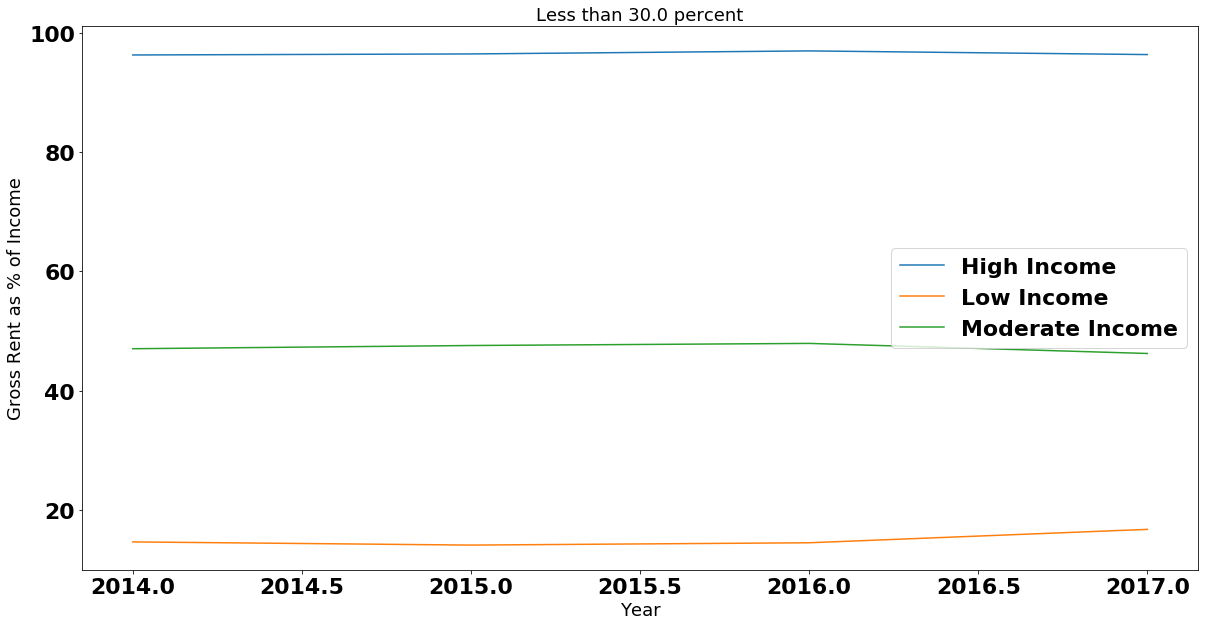

High Income
50.0 percent or more
Low Income
50.0 percent or more
Moderate Income
50.0 percent or more


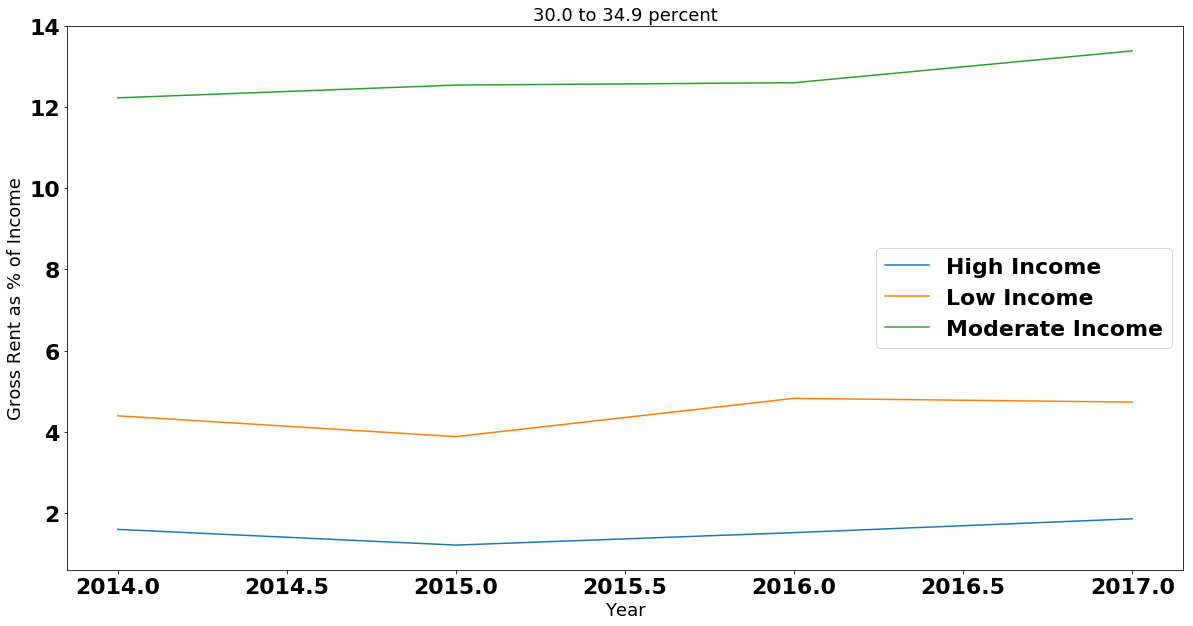

High Income
50.0 percent or more
Low Income
50.0 percent or more
Moderate Income
50.0 percent or more


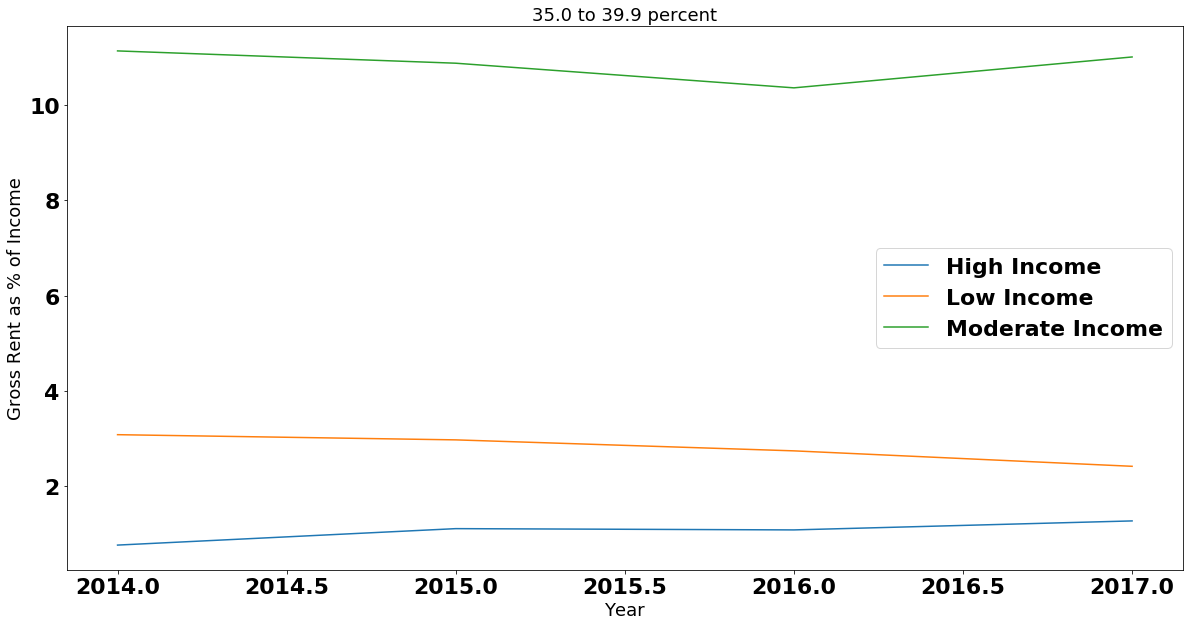

High Income
50.0 percent or more
Low Income
50.0 percent or more
Moderate Income
50.0 percent or more


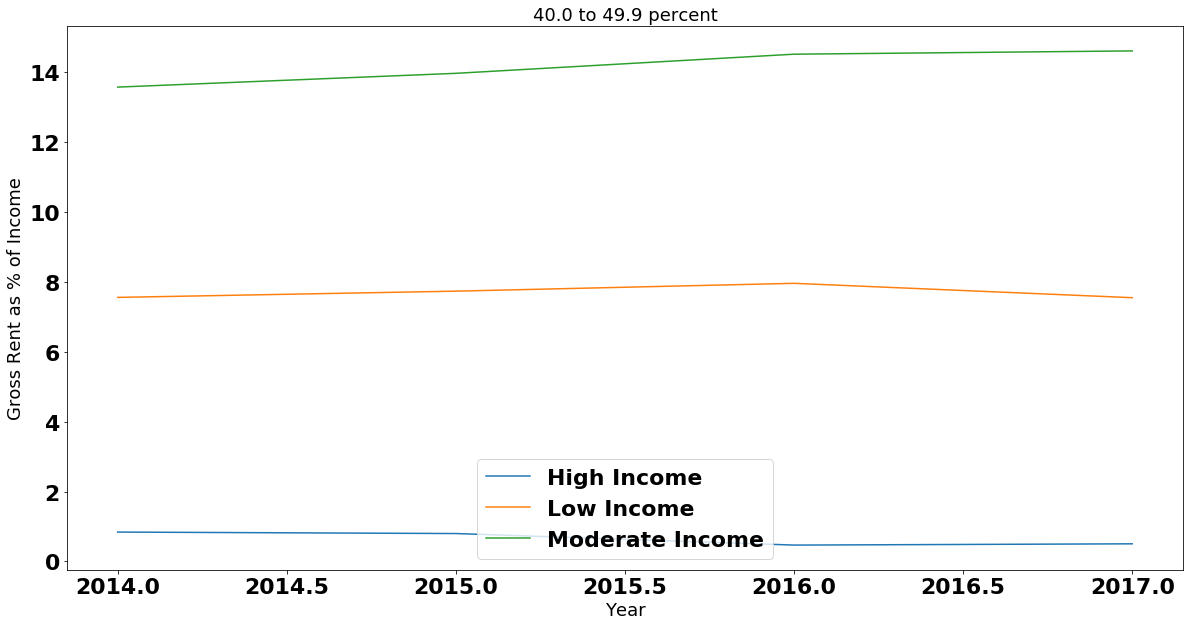

High Income
50.0 percent or more
Low Income
50.0 percent or more
Moderate Income
50.0 percent or more


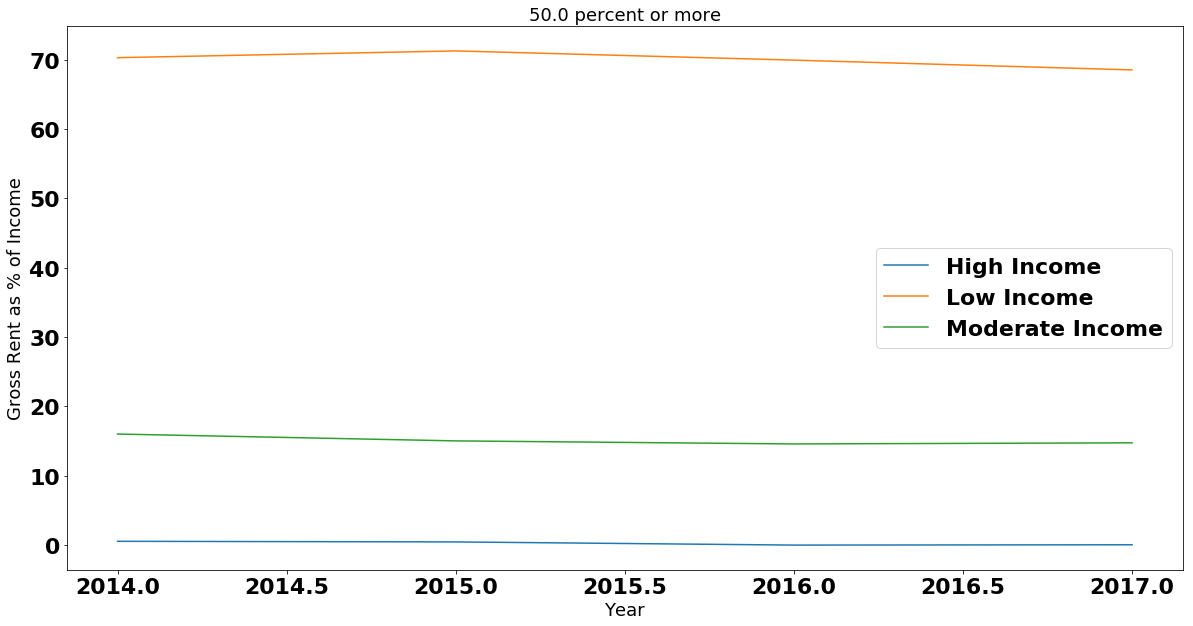

In [74]:
# Generate the Plot (with Error Bars)
keepyear = percentrentbyincomesum['YEAR'] 
percentrentbyincomesum = percentrentbyincomesum.div(percentrentbyincomesum.TotalHHs, axis=0)*100
percentrentbyincomesum['YEAR'] = keepyear
display(percentrentbyincomesum)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)




colors = {'Less than 30.0 percent':'red', '30.0 to 34.9 percent':'blue', '35.0 to 39.9 percent':'green', '40.0 to 49.9 percent':'black', '50.0 percent or more':'pink'}
#markers = {'Capomulin':'4', 'Ceftamin':'8', 'Infubinol':'o', 'Ketapril':'v', 'Naftisol':'^', 'Placebo':'>', 'Propriva':'<', 'Ramicane':'1', 'Stelasyn':'2', 'Zoniferol':'3'}

#display(percentrentbyincomesum.T)

groups = percentrentbyincomesum.groupby('Income')
# percentrentbyincomesum = percentrentbyincomesum.groupby(['Income'])
# groupeddata_sem = percentrentbyincomesum.reset_index()
# display(groupeddata_sem)

#print(percentrentbyincomesum.columns.tolist())

percentbuckets = ['Less than 30.0 percent', '30.0 to 34.9 percent', '35.0 to 39.9 percent', '40.0 to 49.9 percent', '50.0 percent or more']
for bucket in percentbuckets:
    fig, ax = plt.subplots(figsize=(20, 10))
    for name, group in groups:

        print(name)

        x = percentrentbyincomesum.loc[percentrentbyincomesum.index==name, 'YEAR']
        y = percentrentbyincomesum.loc[percentrentbyincomesum.index==name, bucket]
        print(percentbucket)
        plt.plot(x, y,color=colors.get(name), label=name)
    ax.legend()

        # Create a title, x label, and y label for our chart

    plt.title(bucket, fontsize=18)
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("Gross Rent as % of Income", fontsize=18)


    # Save the Figure
    #plt.savefig("../Images/TumorResponse.png")
    plt.show()

# for name, group in groups:
#     for percentbucket in percentbuckets:
#         print(name)
#         x = percentrentbyincomesum.loc[percentrentbyincomesum.index==name, 'YEAR']
#         y = percentrentbyincomesum.loc[percentrentbyincomesum.index==name, percentbucket]
#         plt.plot(x, y,color=colors.get(name), label=name)
#         ax.legend()





In [ ]:
# Generate the Plot (with Error Bars)
keepyear = percentrentbyincomesum['YEAR'] 
percentrentbyincomesum = percentrentbyincomesum.div(percentrentbyincomesum.TotalHHs, axis=0)*100
percentrentbyincomesum['YEAR'] = keepyear
display(percentrentbyincomesum)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)




colors = {'Less than 30.0 percent':'red', '30.0 to 34.9 percent':'blue', '35.0 to 39.9 percent':'green', '40.0 to 49.9 percent':'black', '50.0 percent or more':'pink'}
#markers = {'Capomulin':'4', 'Ceftamin':'8', 'Infubinol':'o', 'Ketapril':'v', 'Naftisol':'^', 'Placebo':'>', 'Propriva':'<', 'Ramicane':'1', 'Stelasyn':'2', 'Zoniferol':'3'}

#display(percentrentbyincomesum.T)

groups = percentrentbyincomesum.groupby('Income')
# percentrentbyincomesum = percentrentbyincomesum.groupby(['Income'])
# groupeddata_sem = percentrentbyincomesum.reset_index()
# display(groupeddata_sem)

#print(percentrentbyincomesum.columns.tolist())

percentbuckets = ['Less than 30.0 percent', '30.0 to 34.9 percent', '35.0 to 39.9 percent', '40.0 to 49.9 percent', '50.0 percent or more']
for bucket in percentbuckets:
    fig, ax = plt.subplots(figsize=(20, 10))
    for name, group in groups:

        print(name)

        x = percentrentbyincomesum.loc[percentrentbyincomesum.index==name, 'YEAR']
        y = percentrentbyincomesum.loc[percentrentbyincomesum.index==name, bucket]
        print(percentbucket)
        plt.plot(x, y,color=colors.get(name), label=name)
    ax.legend()

        # Create a title, x label, and y label for our chart

    plt.title(bucket, fontsize=18)
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("Gross Rent as % of Income", fontsize=18)


    # Save the Figure
    #plt.savefig("../Images/TumorResponse.png")
    plt.show()

# for name, group in groups:
#     for percentbucket in percentbuckets:
#         print(name)
#         x = percentrentbyincomesum.loc[percentrentbyincomesum.index==name, 'YEAR']
#         y = percentrentbyincomesum.loc[percentrentbyincomesum.index==name, percentbucket]
#         plt.plot(x, y,color=colors.get(name), label=name)
#         ax.legend()





In [72]:
#Example Usage of Occupancy Over Time

contractrent = alltables['B25056']

contractrent = contractrent.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#display(hhbyincome.head())

contractrent = contractrent.transpose()



#hhbyincome = hhbyincome.filter([1,2])

#hhbyincome = hhbyincome[2012.0]

contractrent['YEAR'] = contractrent.index

#display(hhbyincome)

split1 = contractrent['YEAR'].str.split('Total!!', expand=True)

#display(split1)

#split2 = split1[2].str.split('!!', expand=True)

#display(split2)

#hhbyincome['Income'] = split2[1]
contractrent['Rent'] = split1[1]

#hhbyincome.drop(columns='YEAR')



contractrent = contractrent[[2012.0,'Rent']]

#display(hhbyincome)
#hhbyincome = hhbyincome.dropna(axis=0, how='any')
display(contractrent)
# display(hhbyincome.pivot(index=hhbyincome['Income'], columns=hhbyincome['Rent Change'], values=hhbyincome[2012.0]))

# pd.crosstab(index=contractrent.iloc[:,0], columns=contractrent.iloc[:,1], values=contractrent.iloc[:,1], aggfunc='sum')

# pd.crosstab(index=contractrent.iloc[:,1], columns=contractrent.iloc[:,1], values=contractrent.iloc[:,0], aggfunc='sum')
contractrent.index = contractrent['Rent']
# contractrent.drop(rows=['Rent'])
contractrent.transpose()

KeyError: 'B25056'

In [257]:
#Example Usage of Occupancy Over Time

availability = alltables['B25061']

availability = availability.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#display(hhbyincome.head())

availability = availability.transpose()



#hhbyincome = hhbyincome.filter([1,2])

#hhbyincome = hhbyincome[2012.0]

availability['YEAR'] = availability.index

#display(hhbyincome)

split1 = availability['YEAR'].str.split('Total!!', expand=True)

#display(split1)

#split2 = split1[2].str.split('!!', expand=True)

#display(split2)

#hhbyincome['Income'] = split2[1]
availability['Rent'] = split1[1]

#hhbyincome.drop(columns='YEAR')



availability = availability[[2012.0,'Rent']]

#display(hhbyincome)
#hhbyincome = hhbyincome.dropna(axis=0, how='any')
display(availability)
# display(hhbyincome.pivot(index=hhbyincome['Income'], columns=hhbyincome['Rent Change'], values=hhbyincome[2012.0]))

# pd.crosstab(index=availability.iloc[:,0], columns=availability.iloc[:,1], values=availability.iloc[:,1], aggfunc='sum')

# pd.crosstab(index=availability.iloc[:,1], columns=availability.iloc[:,1], values=availability.iloc[:,0], aggfunc='sum')
availability.index = availability['Rent']
# availability.drop(rows=['Rent'])
availability.transpose()

YEAR,2012.0,Rent
GEOID,1.679137e+12,None
RENT ASKED_Estimate!!Total,1.622400e+04,None
RENT ASKED_Estimate!!Total!!Less than $100,1.440000e+02,Less than $100
RENT ASKED_Estimate!!Total!!$100 to $149,9.100000e+01,$100 to $149
RENT ASKED_Estimate!!Total!!$150 to $199,1.070000e+02,$150 to $199
RENT ASKED_Estimate!!Total!!$200 to $249,1.040000e+02,$200 to $249
RENT ASKED_Estimate!!Total!!$250 to $299,1.040000e+02,$250 to $299
RENT ASKED_Estimate!!Total!!$300 to $349,4.200000e+01,$300 to $349
RENT ASKED_Estimate!!Total!!$350 to $399,9.500000e+01,$350 to $399
RENT ASKED_Estimate!!Total!!$400 to $449,2.960000e+02,$400 to $449


Rent,None,None,Less than $100,$100 to $149,$150 to $199,$200 to $249,$250 to $299,$300 to $349,$350 to $399,$400 to $449,...,$600 to $649,$650 to $699,$700 to $749,$750 to $799,$800 to $899,$900 to $999,"$1,000 to $1,249","$1,250 to $1,499","$1,500 to $1,999","$2,000 to $2,499"
YEAR,,,,,,,,,,,,,,,,,,,,,
2012.0,1.67914e+12,16224,144,91,107,104,104,42,95,296,...,975,1265,1071,629,2131,1393,2354,1193,579,513
Rent,None,None,Less than $100,$100 to $149,$150 to $199,$200 to $249,$250 to $299,$300 to $349,$350 to $399,$400 to $449,...,$600 to $649,$650 to $699,$700 to $749,$750 to $799,$800 to $899,$900 to $999,"$1,000 to $1,249","$1,250 to $1,499","$1,500 to $1,999","$2,000 to $2,499"


In [ ]:
#Example Usage of Occupancy Over Time

contractrent = alltables['B25063']

contractrent = contractrent.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#display(hhbyincome.head())

contractrent = contractrent.transpose()



#hhbyincome = hhbyincome.filter([1,2])

#hhbyincome = hhbyincome[2012.0]

contractrent['YEAR'] = contractrent.index

#display(hhbyincome)

split1 = contractrent['YEAR'].str.split('Total!!', expand=True)

#display(split1)

#split2 = split1[2].str.split('!!', expand=True)

#display(split2)

#hhbyincome['Income'] = split2[1]
contractrent['Rent'] = split1[1]

#hhbyincome.drop(columns='YEAR')



contractrent = contractrent[[2012.0,'Rent']]

#display(hhbyincome)
#hhbyincome = hhbyincome.dropna(axis=0, how='any')
display(contractrent)
# display(hhbyincome.pivot(index=hhbyincome['Income'], columns=hhbyincome['Rent Change'], values=hhbyincome[2012.0]))

# pd.crosstab(index=contractrent.iloc[:,0], columns=contractrent.iloc[:,1], values=contractrent.iloc[:,1], aggfunc='sum')

# pd.crosstab(index=contractrent.iloc[:,1], columns=contractrent.iloc[:,1], values=contractrent.iloc[:,0], aggfunc='sum')
contractrent.index = contractrent['Rent']
# contractrent.drop(rows=['Rent'])
contractrent.transpose()

In [30]:
#Example Usage of Occupancy Over Time

grossrent = alltables['B25063']

grossrent = grossrent.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#display(hhbyincome.head())

grossrent = grossrent.transpose()



#hhbyincome = hhbyincome.filter([1,2])

#hhbyincome = hhbyincome[2012.0]

grossrent['YEAR'] = grossrent.index

#display(hhbyincome)

split1 = grossrent['YEAR'].str.split('Total!!', expand=True)

#display(split1)

#split2 = split1[2].str.split('!!', expand=True)

#display(split2)

#hhbyincome['Income'] = split2[1]
grossrent['Rent'] = split1[1]

#hhbyincome.drop(columns='YEAR')

years = [2014.0,2015.0,2016.0,2017.0]

grossrent2= grossrent.copy()

grossrentsum =pd.DataFrame()

for year in years:

    grossrent = grossrent2[[year,'Rent']]

    #display(hhbyincome)
    #hhbyincome = hhbyincome.dropna(axis=0, how='any')
    #display(grossrent)
    # display(hhbyincome.pivot(index=hhbyincome['Income'], columns=hhbyincome['Rent Change'], values=hhbyincome[2012.0]))

    # pd.crosstab(index=grossrent.iloc[:,0], columns=grossrent.iloc[:,1], values=grossrent.iloc[:,1], aggfunc='sum')

    # pd.crosstab(index=grossrent.iloc[:,1], columns=grossrent.iloc[:,1], values=grossrent.iloc[:,0], aggfunc='sum')
    grossrent.index = grossrent['Rent']
    grossrent = grossrent.drop(columns='Rent')
    # grossrent.drop(rows=['Rent'])
    grossrentfinal = grossrent.transpose()
    grossrentsum = grossrentsum.append(grossrentfinal)
    
display(grossrentsum)    

Rent,None,None,With cash rent,With cash rent!!Less than $100,With cash rent!!$100 to $149,With cash rent!!$150 to $199,With cash rent!!$200 to $249,With cash rent!!$250 to $299,With cash rent!!$300 to $349,With cash rent!!$350 to $399,...,With cash rent!!$650 to $699,With cash rent!!$700 to $749,With cash rent!!$750 to $799,With cash rent!!$800 to $899,With cash rent!!$900 to $999,"With cash rent!!$1,000 to $1,249","With cash rent!!$1,250 to $1,499","With cash rent!!$1,500 to $1,999","With cash rent!!$2,000 to $2,499","With cash rent!!$2,500 to $2,999"
YEAR,,,,,,,,,,,,,,,,,,,,,
2014.0,1.679137e+12,101646.0,99036.0,509.0,679.0,1766.0,2499.0,1596.0,1608.0,1098.0,...,3709.0,4401.0,4701.0,10576.0,10282.0,21962.0,11539.0,9639.0,3925.0,2610.0
2015.0,1.679137e+12,104888.0,102110.0,494.0,704.0,1619.0,2438.0,1484.0,1462.0,1010.0,...,3759.0,4729.0,4685.0,11337.0,10837.0,21749.0,12618.0,10364.0,2752.0,681.0
2016.0,1.679137e+12,107962.0,104997.0,498.0,714.0,1628.0,2385.0,1456.0,1559.0,1242.0,...,3423.0,4616.0,4336.0,10517.0,10762.0,22455.0,14103.0,11702.0,3209.0,831.0
2017.0,1.679137e+12,108662.0,105867.0,483.0,723.0,1532.0,2502.0,1599.0,1580.0,1178.0,...,2754.0,4321.0,4224.0,9482.0,9847.0,22050.0,14759.0,14694.0,3756.0,1133.0


In [34]:
#Example Usage of Occupancy Over Time

rentasked = alltables['B25061']

rentasked = rentasked.groupby('YEAR').sum()
#occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#display(hhbyincome.head())

rentasked = rentasked.transpose()



#hhbyincome = hhbyincome.filter([1,2])

#hhbyincome = hhbyincome[2012.0]

rentasked['YEAR'] = rentasked.index

#display(hhbyincome)

split1 = rentasked['YEAR'].str.split('Total!!', expand=True)

#display(split1)

#split2 = split1[2].str.split('!!', expand=True)

#display(split2)

#hhbyincome['Income'] = split2[1]
rentasked['Rent'] = split1[1]

#hhbyincome.drop(columns='YEAR')

years = [2014.0,2015.0,2016.0,2017.0]

rentasked2= rentasked.copy()

rentaskedsum =pd.DataFrame()

for year in years:

    rentasked = rentasked2[[year,'Rent']]

    #display(hhbyincome)
    #hhbyincome = hhbyincome.dropna(axis=0, how='any')
    #display(rentasked)
    # display(hhbyincome.pivot(index=hhbyincome['Income'], columns=hhbyincome['Rent Change'], values=hhbyincome[2012.0]))

    # pd.crosstab(index=rentasked.iloc[:,0], columns=rentasked.iloc[:,1], values=rentasked.iloc[:,1], aggfunc='sum')

    # pd.crosstab(index=rentasked.iloc[:,1], columns=rentasked.iloc[:,1], values=rentasked.iloc[:,0], aggfunc='sum')
    rentasked.index = rentasked['Rent']
    rentasked = rentasked.drop(columns='Rent')
    # rentasked.drop(rows=['Rent'])
    rentaskedfinal = rentasked.transpose()
    rentaskedsum = rentaskedsum.append(rentaskedfinal)
    
display(rentaskedsum)    

Rent,None,None,None,Less than $100,$100 to $149,$150 to $199,$200 to $249,$250 to $299,$300 to $349,$350 to $399,...,$600 to $649,$650 to $699,$700 to $749,$750 to $799,$800 to $899,$900 to $999,"$1,000 to $1,249","$1,250 to $1,499","$1,500 to $1,999","$2,000 to $2,499"
YEAR,,,,,,,,,,,,,,,,,,,,,
2014.0,49148.0,1.679137e+12,15243.0,117.0,109.0,60.0,219.0,82.0,72.0,101.0,...,814.0,1331.0,1015.0,748.0,1316.0,1306.0,2390.0,1376.0,678.0,484.0
2015.0,49276.0,1.679137e+12,13452.0,107.0,149.0,42.0,151.0,32.0,73.0,83.0,...,860.0,1112.0,902.0,738.0,1155.0,988.0,1856.0,1437.0,766.0,199.0
2016.0,49404.0,1.679137e+12,12483.0,109.0,86.0,65.0,74.0,62.0,131.0,96.0,...,819.0,822.0,950.0,740.0,1047.0,1065.0,1573.0,1257.0,1055.0,214.0
2017.0,49532.0,1.679137e+12,12775.0,50.0,114.0,94.0,77.0,20.0,115.0,128.0,...,581.0,733.0,820.0,664.0,1082.0,923.0,1901.0,1590.0,1524.0,401.0


In [35]:
rentaskedsum + grossrentsum

Rent,"$1,000 to $1,249","$1,250 to $1,499","$1,500 to $1,999",$100 to $149,$150 to $199,"$2,000 to $2,499",$200 to $249,$250 to $299,$300 to $349,$350 to $399,...,With cash rent!!$750 to $799,With cash rent!!$800 to $899,With cash rent!!$900 to $999,With cash rent!!Less than $100,None,None,None,None,None,None
YEAR,,,,,,,,,,,,,,,,,,,,,
2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.679137e+12,150794.0,3.358274e+12,1.679137e+12,1.679137e+12,116889.0
2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.679137e+12,154164.0,3.358274e+12,1.679137e+12,1.679137e+12,118340.0
2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.679137e+12,157366.0,3.358274e+12,1.679137e+12,1.679137e+12,120445.0
2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.679137e+12,158194.0,3.358274e+12,1.679137e+12,1.679137e+12,121437.0
